<a href="https://colab.research.google.com/github/CALDISS-AAU/sdsphd19_coursematerials/blob/master/CALDISS_PHD_Intro_UML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Premable

In [0]:
import pandas as pd #Pandas handles tabular data
pd.set_option('display.float_format', lambda x: '%.3f' % x) # turn off scientific notation and too much decimal blah
import matplotlib.pyplot as plt # standard plotting library
import seaborn as sns # For pretty dataviz
sns.set_style("darkgrid") # Define style for dataviz
import numpy as np #Numpy for linear algebra & co

# Introduction to Machine Learning

## General

As with any concept, machine learning may have a slightly different definition, depending on whom you ask. A little compilation of definitions by academics and practioneers alike:

* "Machine Learning at its most basic is the practice of using algorithms to parse data, learn from it, and then make a determination or prediction about something in the world." - Nvidia 
* "Machine learning is the science of getting computers to act without being explicitly programmed." - Stanford
* "Machine learning is based on algorithms that can learn from data without relying on rules-based programming."- McKinsey & Co.
* "Machine learning algorithms can figure out how to perform important tasks by generalizing from examples." - University of Washington
* "The field of Machine Learning seeks to answer the question "How can we build computer systems that automatically improve with experience, and what are the fundamental laws that govern all learning processes?" - Carnegie Mellon University


## Supervised vs. Unsupervised ML

<div>
<img src="https://www.dropbox.com/s/45m8ef7qsmqbhvs/super_unsuper2.png?dl=1" align="middle" style="width: 1000px;"/>
</div>


### Supervised ML

* Concerned with labeling/classification/input-output-mapping/prediction tasks
* Subject of the next lecture, so stay patient

### Unsupervised ML

Tasks related to pattern recognition and data exploration, in dase there yet does not exist a right answer or problem structure. Main applications:

1. **Dimensionality reduction:** Finding patterns in the features of the data
2. **Clustering:** Finding homogenous subgroups within larger group

# Dimensionality Reduction Techniques


## Introduction

Dimensionality reduction techniques are foremost useful to (you might see it coming) reduce the dimensionality of our data. So, what does that mean? And why should we want to do that?

Dimensions here is a synonym for variables, so what we want to really do is have less variables. To do that, we have to find ways to express the same amount of information with fewer, but more information-rich variables. This is particularly useful to:

* Find patterns in the **features** of the data.
* Visualization of **high-dimensional** data.
* **Pre-processing** before supervised ML tasks (complexity & noise reduction).

The type of analysis to be performed depends on the data set formats and structures. The most commonly used DR techniques are:

* **Principal Component Analysis (PCA):** Is used to summarize the information contained in a continuous (i.e, quantitative) multivariate data by reducing the dimensionality of the data without loosing important information.
* **Correspondence Analysis (CA):** An extension of the principal component analysis suited to analyse a large contingency table formed by two qualitative variables (or categorical data).
* **Multiple Correspondence Analysis (MCA):** An adaptation of CA to a data table containing more than two categorical variables.
* **Multiple Factor Analysis (MFA):** Dedicated to datasets where variables are organized into groups (qualitative and/or quantitative variables).
* **Hierarchical Multiple Factor Analysis (HMFA):** An extension of MFA in a situation where the data are organized into a hierarchical structure.
* **Factor Analysis of Mixed Data (FAMD):** A particular case of the MFA, dedicated to analyze a data set containing both quantitative and qualitative variables.

![](https://www.dropbox.com/s/uwhlsjwl4yxb25y/dim_tech.png?dl=1)



# Principal Component Analysis (PCA)



## General

* A popular method is "Principal Component Analysis" (PCA)
* Three goals when finding lower dimensional
representation of features:
     1. Find linear combination of variables to createprincipal components
     2. Maintain most variance in the data
     3. Principal components are uncorrelated (i.e.orthogonal to each other)

## The intuition behind it
I won't go into too much detail with the math, but the basics of PCA are as follows: you take a dataset with many variables, and you simplify that dataset by turning your original variables into a smaller number of "Principal Components".

![](https://www.dropbox.com/s/n8mefi1s2wt9h9g/PCA1.png?dl=1)



But what are these exactly? Principal Components are the underlying structure in the data. They are the directions where there is the most variance, the directions where the data is most spread out. This means that we try to find the straight line that best spreads the data out when it is projected along it. This is the first principal component, the straight line that shows the most substantial variance in the data.

![](https://www.dropbox.com/s/3iw8vizfick75lh/PCA2.png?dl=1)

Where many variables correlate with one another, they will all contribute strongly to the same principal component. Each principal component sums up a certain percentage of the total variation in the dataset. Where your initial variables are strongly correlated with one another, you will be able to approximate most of the complexity in your dataset with just a few principal components. Usually, the first principal component captures the main similarity in your data, the second the main difference.

![](https://www.dropbox.com/s/tjooyreiguak7oy/PCA3.png?dl=1)

These principal components can be computed via **Eigenvalues** and **Eigenvectors**. Just like many things in life, eigenvectors, and eigenvalues come in pairs: every eigenvector has a corresponding eigenvalue. Simply put, an eigenvector is a direction, such as "vertical" or "45 degrees", while an eigenvalue is a number telling you how much variance there is in the data in that direction. The eigenvector with the highest eigenvalue is, therefore, the first principal component. The number of eigenvalues and eigenvectors that exits is equal to the number of dimensions the data set has. Consequently, we can reframe a dataset in terms of these eigenvectors and eigenvalues without changing the underlying information. 

Note that reframing a dataset regarding a set of eigenvalues and eigenvectors does not entail changing the data itself, you're just looking at it from a different angle, which should represent the data better.

## The math behind Eigendecompositions

The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the "core" of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

In [97]:
# define a matrix
mat = np.array([[1, 2, 4], [3, 4, 4], [3, 6, 7]])

mat

array([[1, 2, 4],
       [3, 4, 4],
       [3, 6, 7]])

In [0]:
# center columns by subtracting column means
mat_cent = mat - np.mean(mat.T, axis=1)

In [99]:
# Compute the covariance matrix
cov_mat = np.cov(mat_cent.T)
print('Covariance matrix by NumPy\n%s' %cov_mat)

Covariance matrix by NumPy
[[1.33333333 2.         1.        ]
 [2.         4.         3.        ]
 [1.         3.         3.        ]]


In [100]:
# Next, we perform an eigendecomposition on the covariance matrix:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.34238119 -0.6882472   0.63960215]
 [-0.73367398 -0.22941573 -0.63960215]
 [-0.58693919  0.6882472   0.42640143]]

Eigenvalues 
[7.33333333e+00 1.00000000e+00 2.20574804e-16]


## Python Tools

In [0]:
# Import the functions we need
from sklearn.decomposition import PCA # PCA from  sklearn, the python ML standard library

In [0]:
# Initialize
model = PCA()

In [103]:
# Fit the model
model.fit(mat)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [104]:
model.components_

array([[ 0.34238119,  0.73367398,  0.58693919],
       [ 0.6882472 ,  0.22941573, -0.6882472 ],
       [-0.63960215,  0.63960215, -0.42640143]])

In [105]:
model.explained_variance_

array([7.33333333e+00, 1.00000000e+00, 1.09813024e-32])

In [0]:
# Transform the original data
mat_pca = model.transform(mat)

In [107]:
mat_pca

array([[-2.51079541e+00, -6.88247202e-01,  5.55111512e-16],
       [-3.58685058e-01,  1.14707867e+00,  1.11022302e-16],
       [ 2.86948046e+00, -4.58831468e-01, -3.33066907e-16]])

## Example

### Load the data

In [0]:
# load dataset into Pandas DataFrame
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                 names=['sepal length','sepal width','petal length','petal width','species'])

### Brief exploration

In [109]:
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.100,3.500,1.400,0.200,Iris-setosa
1,4.900,3.000,1.400,0.200,Iris-setosa
2,4.700,3.200,1.300,0.200,Iris-setosa
3,4.600,3.100,1.500,0.200,Iris-setosa
4,5.000,3.600,1.400,0.200,Iris-setosa


In [110]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000,150.000,150.000,150.000
mean,5.843,3.054,3.759,1.199
std,0.828,0.434,1.764,0.763
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


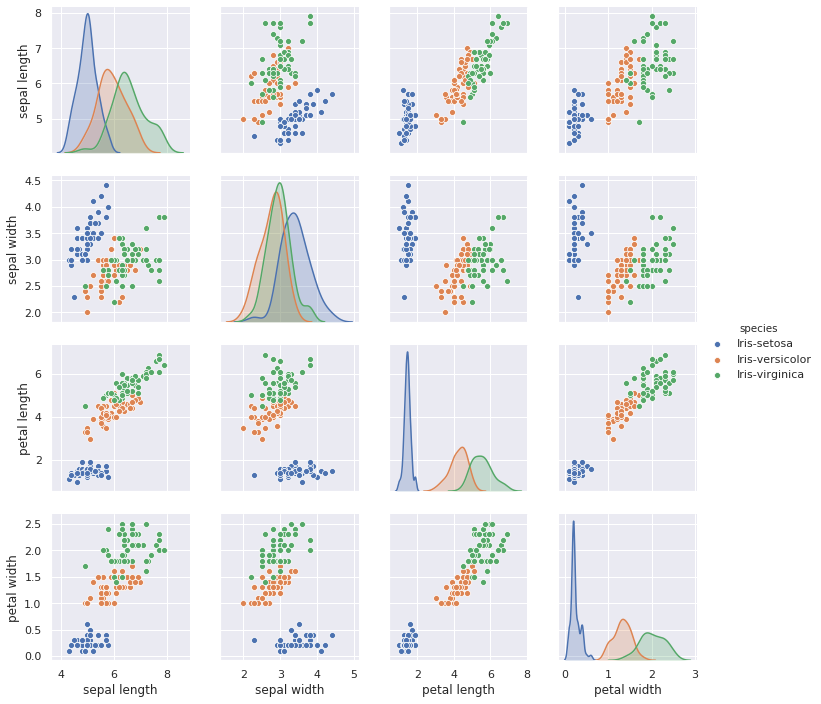

In [111]:
sns.pairplot(data, hue='species')

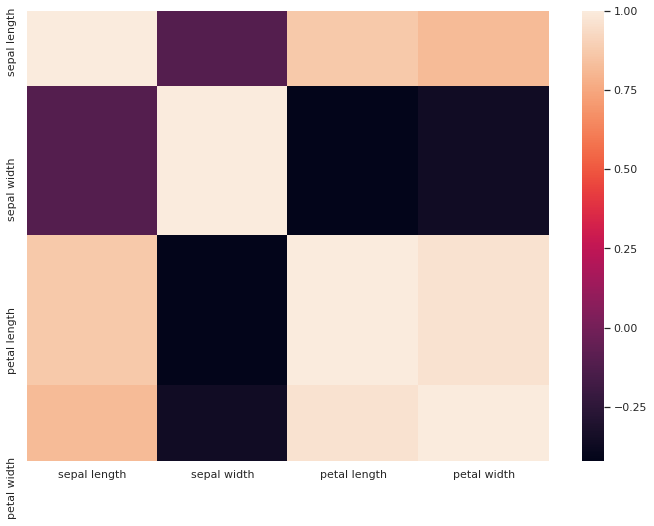

In [112]:
sns.heatmap(data.corr())

### Preprocessing

In [0]:
# Import 
from sklearn.decomposition import PCA # For PCA
from sklearn.preprocessing import StandardScaler # For feature scaling

In [0]:
data.set_index('species',inplace=True)

In [0]:
# Let's standard-scale our data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [116]:
pd.DataFrame(data_scaled, columns=data.columns).describe()

,sepal length,sepal width,petal length,petal width
count,150.000,150.000,150.000,150.000
mean,-0.000,-0.000,0.000,0.000
std,1.003,1.003,1.003,1.003
min,-1.870,-2.439,-1.569,-1.444
25%,-0.901,-0.588,-1.228,-1.182
50%,-0.053,-0.125,0.336,0.133
75%,0.675,0.569,0.763,0.791
max,2.492,3.115,1.786,1.711


### Executingh PCA

In [0]:
# Instantiate a PCA object
model = PCA() # Number of components needs to be defined. We just for illustration take about half of the numbers of features

In [118]:
# Fitr the model
model.fit(data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
# Fit and transform the data
data_reduced = model.transform(data_scaled)

### Inspecting Results

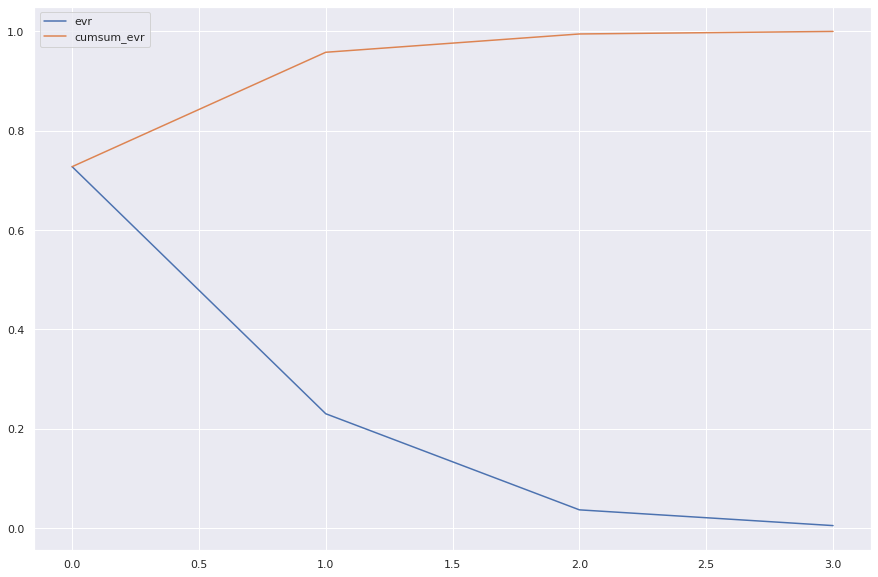

In [120]:
plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

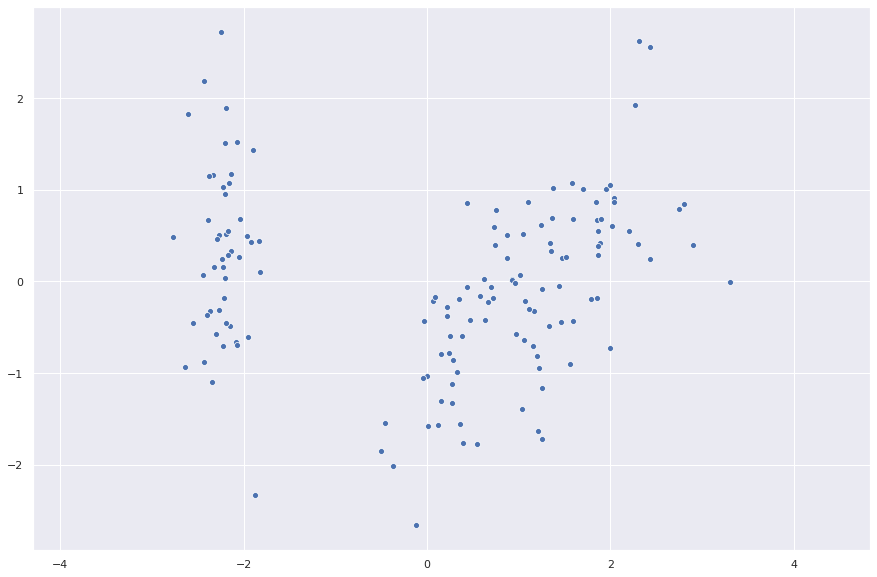

In [121]:
# Scatter plot of the first 2 componentws
sns.scatterplot(x = data_reduced[:,0], y = data_reduced[:,1])
plt.axis('equal')
plt.show()

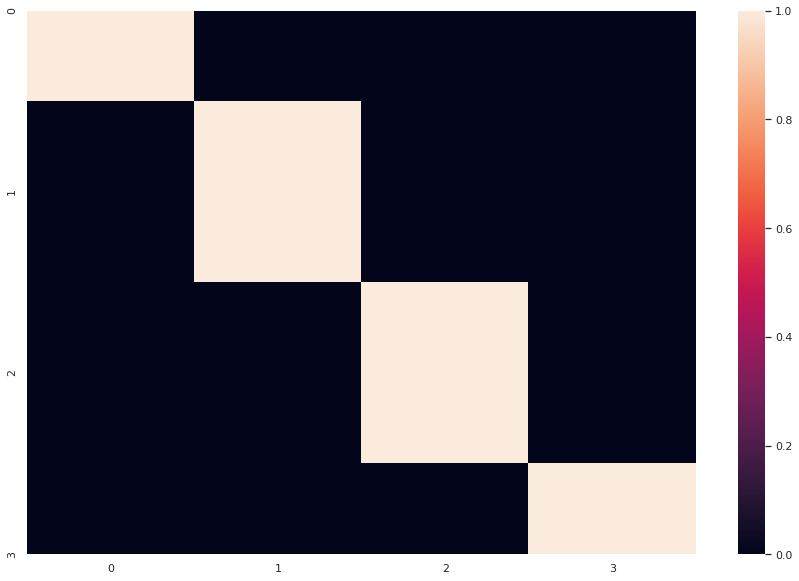

In [122]:
sns.heatmap(pd.DataFrame(data_reduced).corr())

In [0]:
# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]
second_pc = model.components_[1,:]

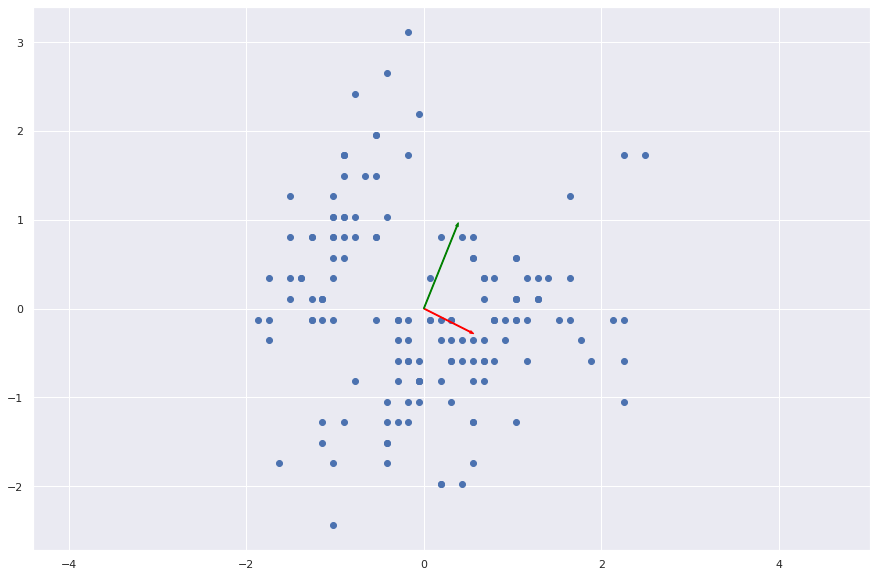

In [124]:
# Make a scatter plot of the untransformed points
plt.scatter(data_scaled[:,0], data_scaled[:,1])

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)
plt.arrow(mean[0], mean[1], second_pc[0], second_pc[1], color='green', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

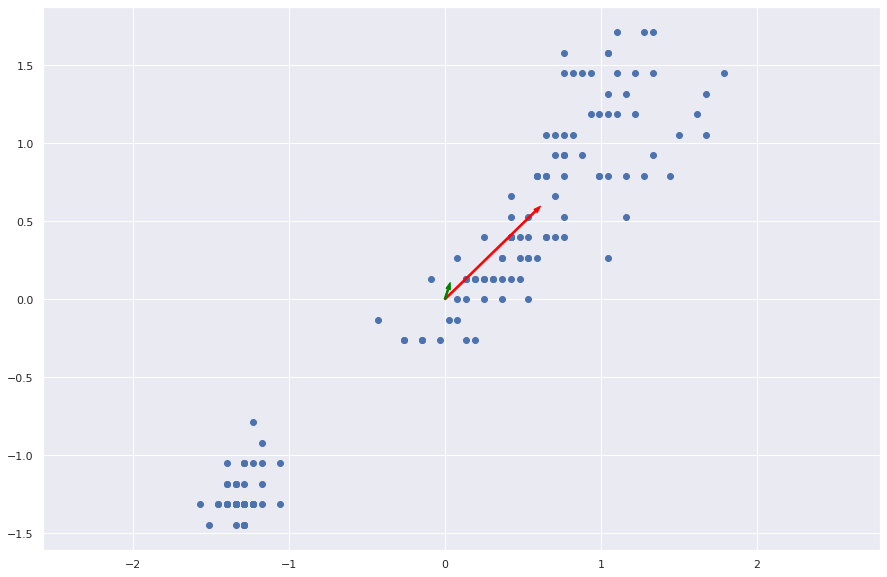

In [125]:
# Make a scatter plot of the untransformed points
plt.scatter(data_scaled[:,2], data_scaled[:,3])

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[2], first_pc[3], color='red', width=0.01)
plt.arrow(mean[0], mean[1], second_pc[2], second_pc[3], color='green', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

In [0]:
pcscores = pd.DataFrame(data_reduced)
loadings = pd.DataFrame(model.components_)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

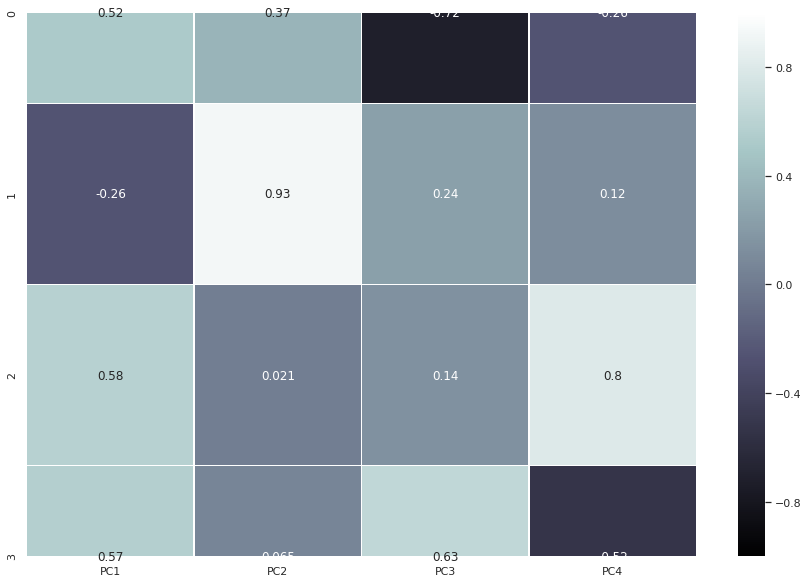

In [127]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bone", vmin=-1, vmax=1, annot=True)

# Case study

## Introduction to the caese
The data used in this tutorial is taken with permission form https://nomadlist.com/

## Loading data 

In [0]:
# We open the data directly from Github
cities = pd.read_csv('https://github.com/SDS-AAU/M1-2019/raw/master/data/nomad_cities.csv', sep='\t')

In [129]:
cities.info

<bound method DataFrame.info of      Unnamed: 0  coffee_in_cafe  cost_beer  ...  racism  safety  weed
0             0           1.730      1.730  ...   0.400   0.600     0
1             1           0.850      0.850  ...   0.400   0.800     0
2             2           1.990      1.990  ...   0.420   0.800     1
3             3           1.880      1.880  ...   0.000   1.000     0
4             4           5.000      5.000  ...   0.800   0.730     0
..          ...             ...        ...  ...     ...     ...   ...
776         776           4.000      4.000  ...   0.200   0.200     0
777         777           2.000      2.000  ...   0.600   0.200     0
778         778           1.600      1.600  ...   0.400   0.200     1
779         779           5.000      5.000  ...   0.000   0.200     0
780         780           0.000      0.000  ...   0.200   0.200     0

[781 rows x 27 columns]>

In [130]:
cities.head()

,Unnamed: 0,coffee_in_cafe,cost_beer,cost_coworking,cost_expat,cost_nomad,female_friendly,fragile_states_index,free_wifi_available,freedom_score,friendly_to_foreigners,internet_speed,latitude,leisure,lgbt_friendly,life_score,longitude,nightlife,nomadScore,nomad_score,peace_score,place,places_to_work,press_freedom_index,racism,safety,weed
0,0,1.730,1.730,152.410,1273,1364,1.000,52.7,0.400,0.6,0.600,31,47.498,0.800,0.270,0.860,19.040,1.000,1.000,1.000,0.8,Budapest,1.000,28.17,0.400,0.600,0
1,1,0.850,0.850,98.880,780,777,0.800,78.8,0.600,0.2,0.600,14,18.788,0.620,0.600,0.750,98.993,0.400,0.950,0.950,0.4,Chiang Mai,0.800,44.53,0.400,0.800,0
2,2,1.990,1.990,159.130,1653,1639,1.000,40.8,0.600,0.8,0.800,15,50.076,1.000,0.600,0.830,14.438,1.000,0.940,0.940,0.8,Prague,1.000,16.66,0.420,0.800,1
3,3,1.880,1.880,47.010,1640,1545,1.000,DotMap(__next__=DotMap()),1.000,0.6,0.800,16,25.091,1.000,0.800,0.930,121.560,0.600,0.940,0.940,DotMap(__next__=DotMap()),Taipei,1.000,24.37,0.000,1.000,0
4,4,5.000,5.000,200.000,3309,3028,0.800,34,0.600,0.6,0.800,118,30.267,1.000,0.600,0.950,-97.743,1.000,0.940,0.940,0.8,Austin,1.000,22.49,0.800,0.730,0


In [131]:
cities.describe()

,Unnamed: 0,coffee_in_cafe,cost_beer,cost_coworking,cost_expat,cost_nomad,female_friendly,free_wifi_available,friendly_to_foreigners,internet_speed,latitude,leisure,lgbt_friendly,life_score,longitude,nightlife,nomadScore,nomad_score,places_to_work,racism,safety,weed
count,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000
mean,390.000,3.296,3.296,210.360,1880.431,2332.348,0.645,0.561,0.737,13.589,29.521,0.631,0.545,0.700,14.851,0.605,0.649,0.649,0.571,23280176929344430622638080.000,0.678,0.117
std,225.600,1.982,1.982,173.979,1265.411,1117.532,0.247,0.240,0.184,18.199,22.174,0.201,0.244,0.148,77.089,0.234,0.135,0.135,0.220,650596606331366367658246144.000,0.210,0.321
min,0.000,0.000,0.000,0.010,296.000,387.000,0.000,0.000,0.000,0.000,-45.879,0.000,0.180,0.010,-157.858,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,195.000,1.600,1.600,88.960,1010.000,1486.000,0.440,0.400,0.600,2.000,19.991,0.450,0.400,0.620,-63.000,0.400,0.550,0.550,0.400,0.400,0.600,0.000
50%,390.000,3.030,3.030,172.050,1646.000,2209.000,0.600,0.600,0.800,6.000,35.514,0.600,0.600,0.720,14.791,0.600,0.680,0.680,0.400,0.600,0.600,0.000
75%,585.000,4.620,4.620,277.350,2408.000,3056.000,0.800,0.800,0.800,19.000,44.933,0.800,0.800,0.810,77.595,0.800,0.740,0.740,0.800,0.800,0.800,0.000
max,780.000,13.720,13.720,1524.460,13406.000,10121.000,1.000,1.000,1.000,197.000,69.649,1.000,1.000,1.000,174.776,1.000,1.000,1.000,1.000,18181818181818001939777978368.000,1.000,1.000


## Preprocessing

For some reason (data is messy) we have the name of the city as well as longitude/langitude but we don't have the country or region names.
Let's try to fix that.

One approach could be based on the lon/lat values, as city names may non-unique.

For this we need to start by "looking up" the country name for each specific coordinate

We can use an offline reverse geocoder package for that.

In [132]:
#Load and instantiate the reversegeocoder
!pip install rgeocoder
from rgeocoder import ReverseGeocoder
rg = ReverseGeocoder()

In [0]:
# That's how it works
location = rg.nearest(56.457, 10.039) #lat, lon

In [134]:
# Let's see what we get
print(location.name)
print(location.admin1)
print(location.admin2)
print(location.cc)

Randers
Central Jutland
Randers Kommune
DK


In [0]:
# A smart way to get all geocoding done in one line
cities['countrycode'] = cities.apply(lambda t: rg.nearest(t['latitude'],t['longitude']).cc, axis=1)

In [136]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 28 columns):
Unnamed: 0                781 non-null int64
coffee_in_cafe            781 non-null float64
cost_beer                 781 non-null float64
cost_coworking            781 non-null float64
cost_expat                781 non-null int64
cost_nomad                781 non-null int64
female_friendly           781 non-null float64
fragile_states_index      781 non-null object
free_wifi_available       781 non-null float64
freedom_score             781 non-null object
friendly_to_foreigners    781 non-null float64
internet_speed            781 non-null int64
latitude                  781 non-null float64
leisure                   781 non-null float64
lgbt_friendly             781 non-null float64
life_score                781 non-null float64
longitude                 781 non-null float64
nightlife                 781 non-null float64
nomadScore                781 non-null float64
nomad_score 

in the above cell we apply the 


```
rg.nearest(t['latitude'],t['longitude']).cc
```

function to each row t of the dataframe cities


```
lambda t:
```

is a rather scary syntactic way of calling an anonymous function

Basically, we could say:


*   For each row of the cities dataframe
*   take the value of the longitude and latitude columns
*   look up the corresponding place
*   write the country code "cc" into a new column "alpha-2"

Now that we have exact country codes for each city, we need to find the regions these countries belong to

Luckily it's easy to find tables listing this information on the internet.

In [0]:
# Download a recent country info table
c = pd.read_csv('https://github.com/SDS-AAU/M1-2019/raw/master/data/countrylist.csv')

In [138]:
c.head()

,alpha_2,region,sub_region
0,AF,Asia,Southern Asia
1,AX,Europe,Northern Europe
2,AL,Europe,Southern Europe
3,DZ,Africa,Northern Africa
4,AS,Oceania,Polynesia


In [0]:
 # Merge this lookup table with our initial cities list
cities = cities.merge(c, left_on='countrycode', right_on='alpha_2')

In [0]:
# Let's select interesting variables for the analysis
vars_analysis = ["cost_nomad", "cost_coworking", "cost_expat", "coffee_in_cafe", "cost_beer", # costs
          "places_to_work", "free_wifi_available", "internet_speed", # work
          "freedom_score", "peace_score", "safety", "fragile_states_index", "press_freedom_index", # safety & freedom
          "female_friendly", "lgbt_friendly", "friendly_to_foreigners", "racism", # friendly
          "leisure","life_score","nightlife","weed"] # fun 

vars_descr = ["nomad_score", "cost_nomad", "places_to_work", "freedom_score", "friendly_to_foreigners", "life_score"]

In [0]:
# And use the selection to only extract these variables into a new object
data = cities[vars_analysis]
descr = cities[vars_descr]

In [142]:
# Quick check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 0 to 779
Data columns (total 21 columns):
cost_nomad                780 non-null int64
cost_coworking            780 non-null float64
cost_expat                780 non-null int64
coffee_in_cafe            780 non-null float64
cost_beer                 780 non-null float64
places_to_work            780 non-null float64
free_wifi_available       780 non-null float64
internet_speed            780 non-null int64
freedom_score             780 non-null object
peace_score               780 non-null object
safety                    780 non-null float64
fragile_states_index      780 non-null object
press_freedom_index       780 non-null object
female_friendly           780 non-null float64
lgbt_friendly             780 non-null float64
friendly_to_foreigners    780 non-null float64
racism                    780 non-null float64
leisure                   780 non-null float64
life_score                780 non-null float64
nightlife   

We can see some strange things going with the data types. Some are floats or ints as we would expect but others are objects

In [143]:
print(data['peace_score'].unique())

['0.8' '0.4' 'DotMap(__next__=DotMap())' 'DotMap()' '1' '0.6' '0.2']


In [144]:
print(data['freedom_score'].unique())

['0.6' '0.2' '0.8' '0.4' '1' 'DotMap()']


In [145]:
print(data['fragile_states_index'].unique())

['52.7' '78.8' '40.8' 'DotMap(__next__=DotMap())' 'DotMap()' '34' '23.8'
 '32.4' '74.2' '35.1' '65.3' '66.1' '39.8' '29.2' '29' '21.3' '22.6'
 '74.9' '84.7' '48.4' '28.6' '70.7' '22.5' '36.1' '28.2' '21.8' '39.6'
 '34.5' '43.1' '27.5' '110.8' '55.9' '53.2' '45.1' '52.9' '21.2' '70.4'
 '32.9' '40.7' '47.4' '43.4' '36.2' '75.5' '67' '73.9' '81' '79.6' '41.9'
 '72' '21.5' '69.6' '44.9' '77.3' '18.8' '64' '52.4' '33.9' '53.7' '78.9'
 '78' '42.4' '70.8' '65' '71.2' '44.5' '51.6' '75.6' '66.3' '80.2' '62'
 '24.1' '72.5' '72.6' '87.7' '55.2' '83.6' '43.2' '61.2' '63.4' '22.8'
 '72.2' '76.3' '66' '74' '73.2' '69.9' '90.7' '66.5' '87.4' '103.5' '98.3'
 '89.6' '78.5' '101.7' '79' '90.2' '56.6' '83.2' '96.3' '84.4' '74.6'
 '104.7' '95.2' '91.2' '78.3' '91.3' '83.5' '87.8' '84.2' '81.8' '97.2'
 '97.7' '79.8' '83.8' '86.9' '100.5' '103.8' '97.8' '90.5' '111.5' '81.6'
 '86.2' '91' '96.4' '93.9']


In [146]:
print(data['press_freedom_index'].unique())

['28.17' '44.53' '16.66' '24.37' '22.49' '15.26' '21.7' '42.64' '28.67'
 '32.62' '46.57' '19.92' '17.27' '14.18' '10.01' '12.33' '41.72' '44.66'
 '25.09' '14.8' '74.27' '28.5' '17.84' '28.58' '8.76' '11.76' '23.84'
 '23.83' '28.93' '13.18' '32.58' '81.35' '30.35' '30.59' '11.1' '24.29'
 '8.79' '49.33' '52.96' '23.89' '17.38' '14.31' '15.88' '32.93' 'DotMap()'
 '36.09' '80.96' '12.4' '54.32' '49.03' '43.17' '19.23' '27.6' '8.89'
 '28.79' '13.26' '50.76' '8.59' '18.26' '27.91' '22.26' '34.46' '27.96'
 '44.49' '19.95' '27.9' '12.45' '28.45' '17.95' '36.73' '40.43' '33.21'
 '29.99' '70.23' '44.11' '53.85' '14.43' '33.63' '44.96' '32.79' '27.99'
 '27.69' '29.92' '54.86' '15.3' '59.72' '57.89' '20.61' '34.17' '28.83'
 '21.92' '45.94' '35.97' '54.55' '40.7' '30.17' '35.9' '31.16' '31.95'
 '31.78' '42.93' '48.52' '28.82' '54.45' '27.61' '38.03' '30.16' '71.58'
 '31.6' '54.35' '39.83' '41.69' '54.61' '61.15' '30.25' '27.04' '28.65'
 '45.13' '44.62' '50.34' '66.52' '40.41' '33.08' '40.53' '39.89

This is a problem that probably has something to do with the scraping process. Let's try to turn everything into floats and if we can't we just put in a missing value statement

In [0]:
# This function will fo exactly that
def floater(x):
  try: #Try to
    return float(x) #Turn X into a floating point number
  except ValueError: #In case a ValueError occurs
    return np.nan #Turn X into np.nan (missing value placeholder)

In [148]:
# map applies the defined function to every observation
data.loc[:,'peace_score'] = data['peace_score'].map(floater)
data.loc[:,'freedom_score'] = data['freedom_score'].map(floater)
data.loc[:,'fragile_states_index'] = data['fragile_states_index'].map(floater)
data.loc[:,'press_freedom_index'] = data['press_freedom_index'].map(floater)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [149]:
# yup, some missing data...
data.isnull().sum()

cost_nomad                 0
cost_coworking             0
cost_expat                 0
coffee_in_cafe             0
cost_beer                  0
places_to_work             0
free_wifi_available        0
internet_speed             0
freedom_score             12
peace_score               25
safety                     0
fragile_states_index      25
press_freedom_index       12
female_friendly            0
lgbt_friendly              0
friendly_to_foreigners     0
racism                     0
leisure                    0
life_score                 0
nightlife                  0
weed                       0
dtype: int64

Now we are facing a new problem - Missing Data. While it would be easier to just kick out these cities, we will try to do better and impute.

Read up on imputation in the documentation of the package: https://github.com/iskandr/fancyimpute
also here: https://medium.com/ibm-data-science-experience/missing-data-conundrum-exploration-and-imputation-techniques-9f40abe0fd87

There are many other packages and modules that perform imputation. I found facyimpute the least problematic so far

In [0]:
# Import the imputation package
from fancyimpute import SoftImpute, SimpleFill

In [0]:
# Easy version: Just replace missing values by the mean of the column
data_imp = SimpleFill(fill_method='mean').fit_transform(data)

In [152]:
# We can have a quick look
pd.DataFrame(data_imp, columns=data.columns).head()

,cost_nomad,cost_coworking,cost_expat,coffee_in_cafe,cost_beer,places_to_work,free_wifi_available,internet_speed,freedom_score,peace_score,safety,fragile_states_index,press_freedom_index,female_friendly,lgbt_friendly,friendly_to_foreigners,racism,leisure,life_score,nightlife,weed
0,1364.000,152.410,1273.000,1.730,1.730,1.000,0.400,31.000,0.600,0.800,0.600,52.700,28.170,1.000,0.270,0.600,0.400,0.800,0.860,1.000,0.000
1,777.000,98.880,780.000,0.850,0.850,0.800,0.600,14.000,0.200,0.400,0.800,78.800,44.530,0.800,0.600,0.600,0.400,0.620,0.750,0.400,0.000
2,1012.000,155.430,1714.000,1.410,1.410,0.800,0.400,14.000,0.200,0.400,0.800,78.800,44.530,0.600,0.800,0.600,0.420,0.600,0.750,0.820,0.000
3,1197.000,131.410,1158.000,2.120,2.120,1.000,1.000,24.000,0.200,0.400,0.770,78.800,44.530,0.800,0.800,1.000,0.420,0.820,0.720,1.000,0.000
4,1352.000,169.560,1347.000,1.410,1.410,0.800,0.400,15.000,0.200,0.400,0.800,78.800,44.530,0.800,0.800,1.000,0.400,0.800,0.800,0.800,0.000


In [153]:
# Or, we go crazy and use a neural network powered method
data_imp = SoftImpute().fit_transform(data)

[SoftImpute] Max Singular Value of X_init = 18181818181818001939777978368.000000
[SoftImpute] Iter 1: observed MAE=22300770491622278299648.000000 rank=1
[SoftImpute] Iter 2: observed MAE=22300770491622265716736.000000 rank=1
[SoftImpute] Iter 3: observed MAE=22300770491622592872448.000000 rank=1
[SoftImpute] Iter 4: observed MAE=22300770491622257328128.000000 rank=1
[SoftImpute] Iter 5: observed MAE=22300770491622550929408.000000 rank=1
[SoftImpute] Iter 6: observed MAE=22300770491621972115456.000000 rank=1
[SoftImpute] Iter 7: observed MAE=22300770491622655787008.000000 rank=1
[SoftImpute] Iter 8: observed MAE=22300770491622244745216.000000 rank=1
[SoftImpute] Iter 9: observed MAE=22300770491622613843968.000000 rank=1
[SoftImpute] Iter 10: observed MAE=22300770491622043418624.000000 rank=1
[SoftImpute] Iter 11: observed MAE=22300770491622697730048.000000 rank=1
[SoftImpute] Iter 12: observed MAE=22300770491622701924352.000000 rank=1
[SoftImpute] Iter 13: observed MAE=22300770491622005

Ok, by now our data is pretty much in the shape we want it to be. No missing values, all features are numeric.

The last thing to do is to standardize the values.

In [0]:
# Let's standard-scale our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_scaled = scaler.fit_transform(data_imp)

As you can see, now our data has a mean of 0 and a standard deviation of one.

In [155]:
pd.DataFrame(data_scaled, columns=data.columns).describe()

,cost_nomad,cost_coworking,cost_expat,coffee_in_cafe,cost_beer,places_to_work,free_wifi_available,internet_speed,freedom_score,peace_score,safety,fragile_states_index,press_freedom_index,female_friendly,lgbt_friendly,friendly_to_foreigners,racism,leisure,life_score,nightlife,weed
count,780.000,780.000,780.000,780.000,780.000,780.000,780.000,780.000,780.000,780.000,780.000,780.000,780.000,780.000,780.000,780.000,780.000,780.000,780.000,780.000,780.000
mean,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-1.740,-1.209,-1.253,-1.664,-1.664,-2.598,-2.344,-0.748,-1.871,-2.597,-3.229,-2.140,-1.736,-2.609,-1.498,-4.008,-0.036,-3.140,-4.673,-2.587,-0.363
25%,-0.757,-0.697,-0.688,-0.856,-0.856,-0.780,-0.674,-0.638,-1.077,-1.003,-0.372,-0.790,-0.635,-0.830,-0.596,-0.744,-0.036,-0.900,-0.545,-0.878,-0.363
50%,-0.110,-0.224,-0.186,-0.119,-0.119,-0.780,0.161,-0.418,0.511,-0.205,-0.372,-0.040,-0.279,-0.184,0.223,0.344,-0.036,-0.153,0.132,-0.023,-0.363
75%,0.649,0.378,0.418,0.669,0.669,1.038,0.996,0.310,0.511,0.592,0.580,0.834,0.485,0.625,1.043,0.344,-0.036,0.843,0.741,0.831,-0.363
max,6.971,7.555,9.108,5.260,5.260,1.946,1.832,10.080,2.099,1.389,1.532,2.287,2.482,1.433,1.863,1.432,27.911,1.838,2.027,1.686,2.752


## Executing the PCA

In [0]:
# Import the module and instantiate a PCA object
from sklearn.decomposition import PCA
pca = PCA(n_components=7) #We pick 7 as the number of components...just because (it's a 3rd of the columns available)

# Fit and transform the data
data_reduced = pca.fit_transform(data_scaled)

In [157]:
# Make sure the data shape is as it should be
data_reduced.shape

(780, 7)

In [0]:
plot_data = pd.DataFrame({'evr': pca.explained_variance_ratio_, 'cumsum_evr': np.cumsum(pca.explained_variance_ratio_)}).stack()

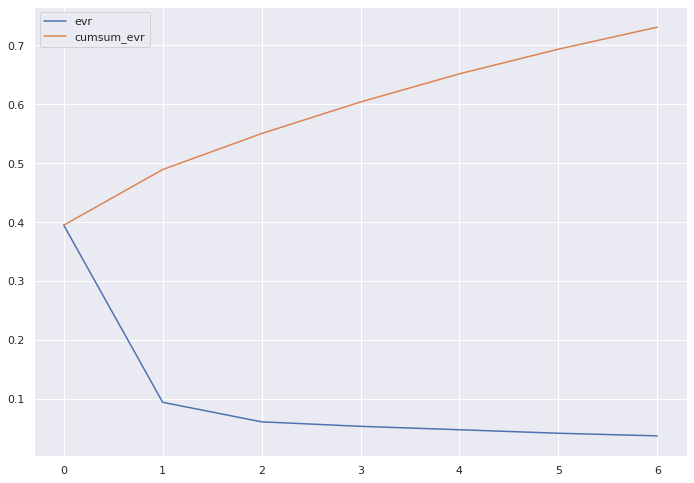

In [159]:
# Is 7 components really a good choice?
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

In [160]:
# How mach "information" do we kick out?
pca.explained_variance_ratio_.sum()

0.7305835971307123

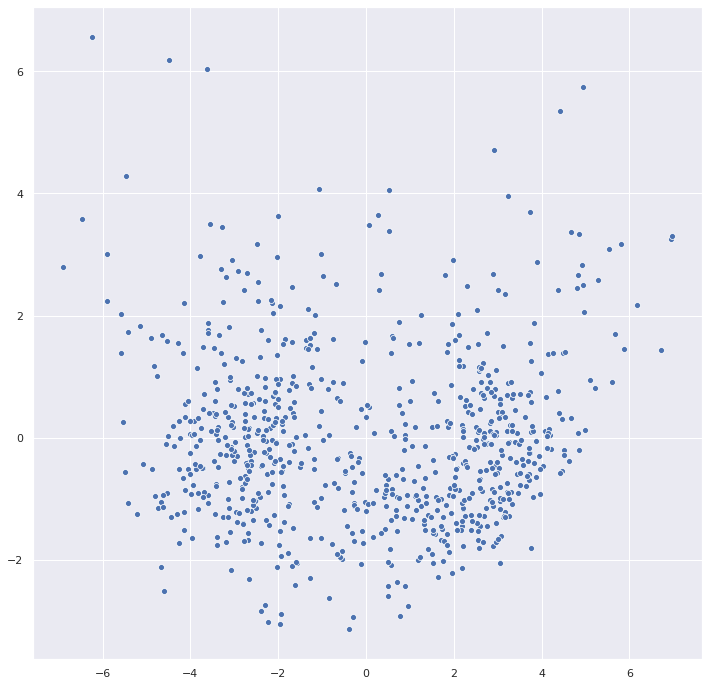

In [161]:
# Now we can plot in our points with some coloring

plt.figure(figsize=(12,12))
g = sns.scatterplot(data_reduced[:,0], data_reduced[:,1],
                    legend='full', palette='viridis')

legend = g.get_legend()

We can certainly make things much more fancy. However, as you can see, that will require more work.

We can use `Bokeh` for an interactive visualisation.

In [0]:
# Load the needed bokeh modules
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show, output_notebook
from bokeh.palettes import Spectral6
from bokeh.transform import factor_cmap

In [0]:
# Define the data that we are going to use as a dictionary

d = {'y':data_reduced[:,1],'x':data_reduced[:,0], 'place': cities.place, 
     'country':cities['alpha_2'],
     'region':cities['sub_region']}

In [169]:
# Defineand transform a color-palette

colors = factor_cmap('region', palette=Spectral6, factors=d['region'].unique())



/usr/local/lib/python3.6/dist-packages/bokeh/models/mappers.py:140: UserWarning: Palette length does not match number of factors. ['Australia and New Zealand' 'Northern Europe'
 'Latin America and the Caribbean' 'Western Asia' 'Southern Asia'
 'Sub-Saharan Africa' 'Northern Africa' 'Central Asia' 'Melanesia'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


In [170]:
# Define interactive tooling and plot for notebook output
output_notebook()

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select"
p = figure(tools=TOOLS)
p.hover.tooltips = [('Place', "@place"),('Country', "@country"),('Region', "@region")]
p.scatter(x='x', y='y',fill_alpha=0.8,
          color = colors,
          line_color = None,
          radius = 0.1,
          source=d)
show(p)

In [0]:
#
# TODO: DO something nice analysing the regions...
#

# Outlook